In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [3]:
# these two function determine the intensity probability function
def theta(y,k,phi0):
    return (np.cos(y*k*phi0)-1)/y/np.sqrt(-np.log(y))
def omega(y,k,phi0):
    return np.sin(y*k*phi0)/y/np.sqrt(-np.log(y))

In [4]:
phi_limit = 4
steps = 101
phi = np.linspace(0,phi_limit,steps)
d = phi_limit/steps

In [8]:
def theta_int(k,phi0):
    if hasattr(k,'__iter__'):
        return np.array([quad(theta,0,1,args=(kk,phi0))[0] for kk in k])
    else:
        return quad(theta,0,1,args=(k,phi0))[0]

def omega_int(k,phi0):
    if hasattr(k,'__iter__'):
        return np.array([quad(omega,0,1,args=(kk,phi0))[0] for kk in k])
    else:
        return quad(omega,0,1,args=(k,phi0))[0]        

In [9]:
def p_phi(k,phi,prefactor,phi0):
    return np.exp(prefactor*theta_int(k,phi0))*np.cos(k*phi-prefactor*omega_int(k,phi0))

In [11]:
prefactor = 1/np.sqrt(2)
phi0=1.0
p_of_phi = np.array([quad(p_phi,0,np.inf,args=(p,prefactor,phi0))[0] for p in phi])

/Users/hstrey/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/hstrey/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/hstrey/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed th

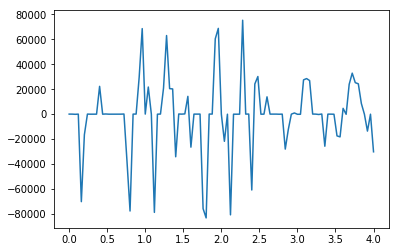

In [12]:
plt.plot(phi,p_of_phi)